# Ajuste de curvas

* Regressão linear por mínimos quadrados
* Linearização

# Motivação

A lei dos gases ideais relaciona pressão, volume e temperatura por meio da fórmula $pV = nRT$, onde $p$ é a pressão ($N/m^2$), $V$ o volume ($m^3$), $T$ a temperatura ($K$) e $R$ a constante universal dos gases.

Foram realizados as seguintes medições experimentais de pressão e temperatura para uma massa de 1kg de gás nitrogênico em um volume de 10$m^3$:

| Temperatura (K) | 230 | 273,15 | 313 | 350 | 390 | 430 |
| --- | --- | --- | --- | --- | --- | --- |
| Pressão (N/m2) | 6.900 | 8.100 | 9.350 | 10.500 | 11.700 | 12.800 |

Segundo este experimento, qual a melhor estimativa para a constante $R$?

(Massa molar do nitrogênico: 28g/mol)

Observe que a equação $pV = nRT$ nos fornece a fórmula $R = pV/nT$

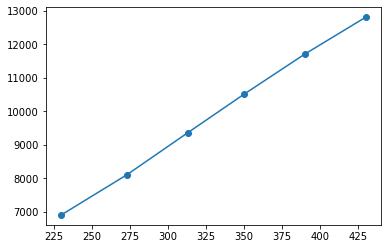

In [35]:
import matplotlib.pyplot as plt
import numpy as np
T = np.array([230, 273.15, 313, 350, 390, 430])
P = np.array([6900, 8100, 9350, 10500, 11700, 12800])
plt.plot(T, P, 'o-')

Entretanto, dependendo do par utilizado P x T, a constante calculada varia:

In [12]:
v = 10000
n = 1000/28.0
i = 0
p = P[i]
t = T[i]
R = p*v/(n*t)
print(R)

8400.0


Uma forma melhor seria estimar o valor utilizando **todos** os dados disponíveis, **minimizando** alguma métrica de **erro**:

* Método dos mínimos quadrados.

Vamos considerar o seguinte cenário:

* Temos um conjunto de dados a respeito de um processo.
* O modelo do processo é linear (equação de uma reta: $y = a_0 + a_1x$).
* Queremos saber quais os melhores parâmetros para $a_0$ e $a_1$ que melhor se ajustam aos dados coletados.

Ou seja, considere que para cada par de dados $(x_i,y_i)$ temos um *erro* ou *resíduo* dado por:

$y_i = a_0 + a_1x_i + e_i$

\begin{equation}
e_i = y_i - a_0 - a_1x_i
\end{equation}


O método dos mínimos quadrados busca minimizar a soma dos quadrados dos resíduos:

$
min \sum\limits_{i=1}^n e_i^2 = \sum\limits_{i=1}^n (y_i - a_0 - a_1x_i)^2
$

Uma forma de determinar os valores que obedecem a este critério é:

\begin{equation} a_1 = \dfrac{n\sum x_iy_i -\sum x_i\sum y_i}{n\sum x_i^2 - (\sum x_i)^2} \end{equation}

\begin{equation} a_0 = \overline{y} - a_1 \overline{x} \end{equation}

onde:

* $\overline{x}$ e $\overline{y}$ são as médias dos vetores $x$ e $y$ respectivamente.

In [33]:
n = 1000/28.0
V = 10000

N = len(T)
a1 = (N*np.dot(T, P) - T.sum() * P.sum()) / ( N*np.square(T).sum() - T.sum()**2 )

R = a1*V/n

a0 = P.mean() - a1*T.mean()

print('a1: ', a1, 'a0: ', a0)
print('R: ', R)


a1:  29.86526026278305 a0:  5.518888178905399
R:  8362.272873579255


Também podemos organizar o conjunto de dados em forma matricial:

\begin{equation}
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = 
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots \\
x_n & 1
\end{bmatrix}
\begin{bmatrix} a_1 \\ a_0 \end{bmatrix}
\end{equation}

para o caso genérico onde temos uma equação do tipo $y = a_1x + a_0$.

No exemplo dado, podemos forçar o valor de $a_0 = 0$ usando a matriz:

\begin{equation}
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = 
\begin{bmatrix}
x_1 & 0 \\
x_2 & 0 \\
\vdots \\
x_n & 0
\end{bmatrix}
\begin{bmatrix} a_1 \\ a_0 \end{bmatrix}
\end{equation}

A função `lstsq` pode ser utilizada para determinar o valor de $a_1$ que minimiza o resíduo.

8366.753552546645


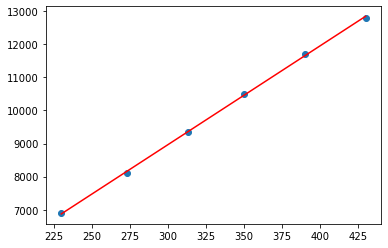

In [34]:
# y = a0 + a1x 
# Ap (p = [a1, a0], A = [x, 0])
# p = R*(n*T/V)
# p = (Rn/V)*T => a1 = Rn/V => R = a1*V/n
n = 1000/28.0
V = 10000

A = np.vstack([T, np.zeros(len(T))]).T
a1, a0 = np.linalg.lstsq(A, P, rcond=None)[0]
R = a1*V/n

print(R)
plt.scatter(T, P)
plt.plot(T, m*T, 'r')

In [22]:
import scipy.optimize as opt

def funcao(T,R):
    # pV = nRT 
    # y = p
    # x = T
    n = 1000/28
    V = 10000.0
    p = n*R*T/V
    return p

y, cov = opt.curve_fit(funcao, T, P)
print(y)

[8366.75355256]
